# DAARIO 101 (on a single modality)


In [3]:
import daario as daa

import torch
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
adata =  sc.datasets.pbmc3k_processed()
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

Here we use a

We need a minimum of 3 inputs types to run DAARIO: the actual data matrices, an optional normalization factor and a likelihood type. We have a simple parser function for AnnData objects but it is always better to understand how to do it explicitly:

In [5]:
# input_matrix, norm_factor, distribution_type = daa.get_input_params_adata(adata) 
# is the same as

input_data = [adata.X]
normalization = [np.ones(adata.X.shape[0])] # If you have a normalization factor for each cell, you can provide it here
input_distribution = ["G"] # G for Gaussian, P for Poisson, N for Negative Binomial

# As a quick note, as you see DAARIO is developed for multi-modal data, 
# so even if you use it for a single modality the inputs are always lists.

We then need to run the model 

In [7]:
res = daa.fit_deepAA(
    [adata.X],
    [np.ones(adata.X.shape[0])],
    ["G"],
    hidden_dims_dec_common = [256,256], # Hidden dimensions of the decoder
    hidden_dims_dec_last = [512], # Hidden dimensions of the decoder last layer
    hidden_dims_enc_ind = [512], # Hidden dimensions of the encoder
    hidden_dims_enc_common = [256,256], # Hidden dimensions of the encoder
    hidden_dims_enc_pre_Z = [128, 64], # Hidden dimensions of the encoder before the Z layer
    lr = 0.001, # Learning rate
    gamma_lr = 0.1, # Learning rate decay factor
    steps = 500,
    narchetypes = 6,
    batch_size = 3000
    )

Bar desc:   0%|          | 0/500 [00:00<?, ?it/s]

Fitting full model!


ELBO: 29732398.00000  : 100%|██████████| 500/500 [00:41<00:00, 12.15it/s]
/home/salvatore.milite/miniconda3/envs/scdeepaa/lib/python3.11/site-packages/pyro/primitives.py:137: RuntimeWarning: trying to observe a value outside of inference at loss
  warnings.warn(


In [8]:
# Utility functions to add archetypes weights to the anndata object
adata, arc_names = scdeepaa.add_to_obs_adata(res, adata)

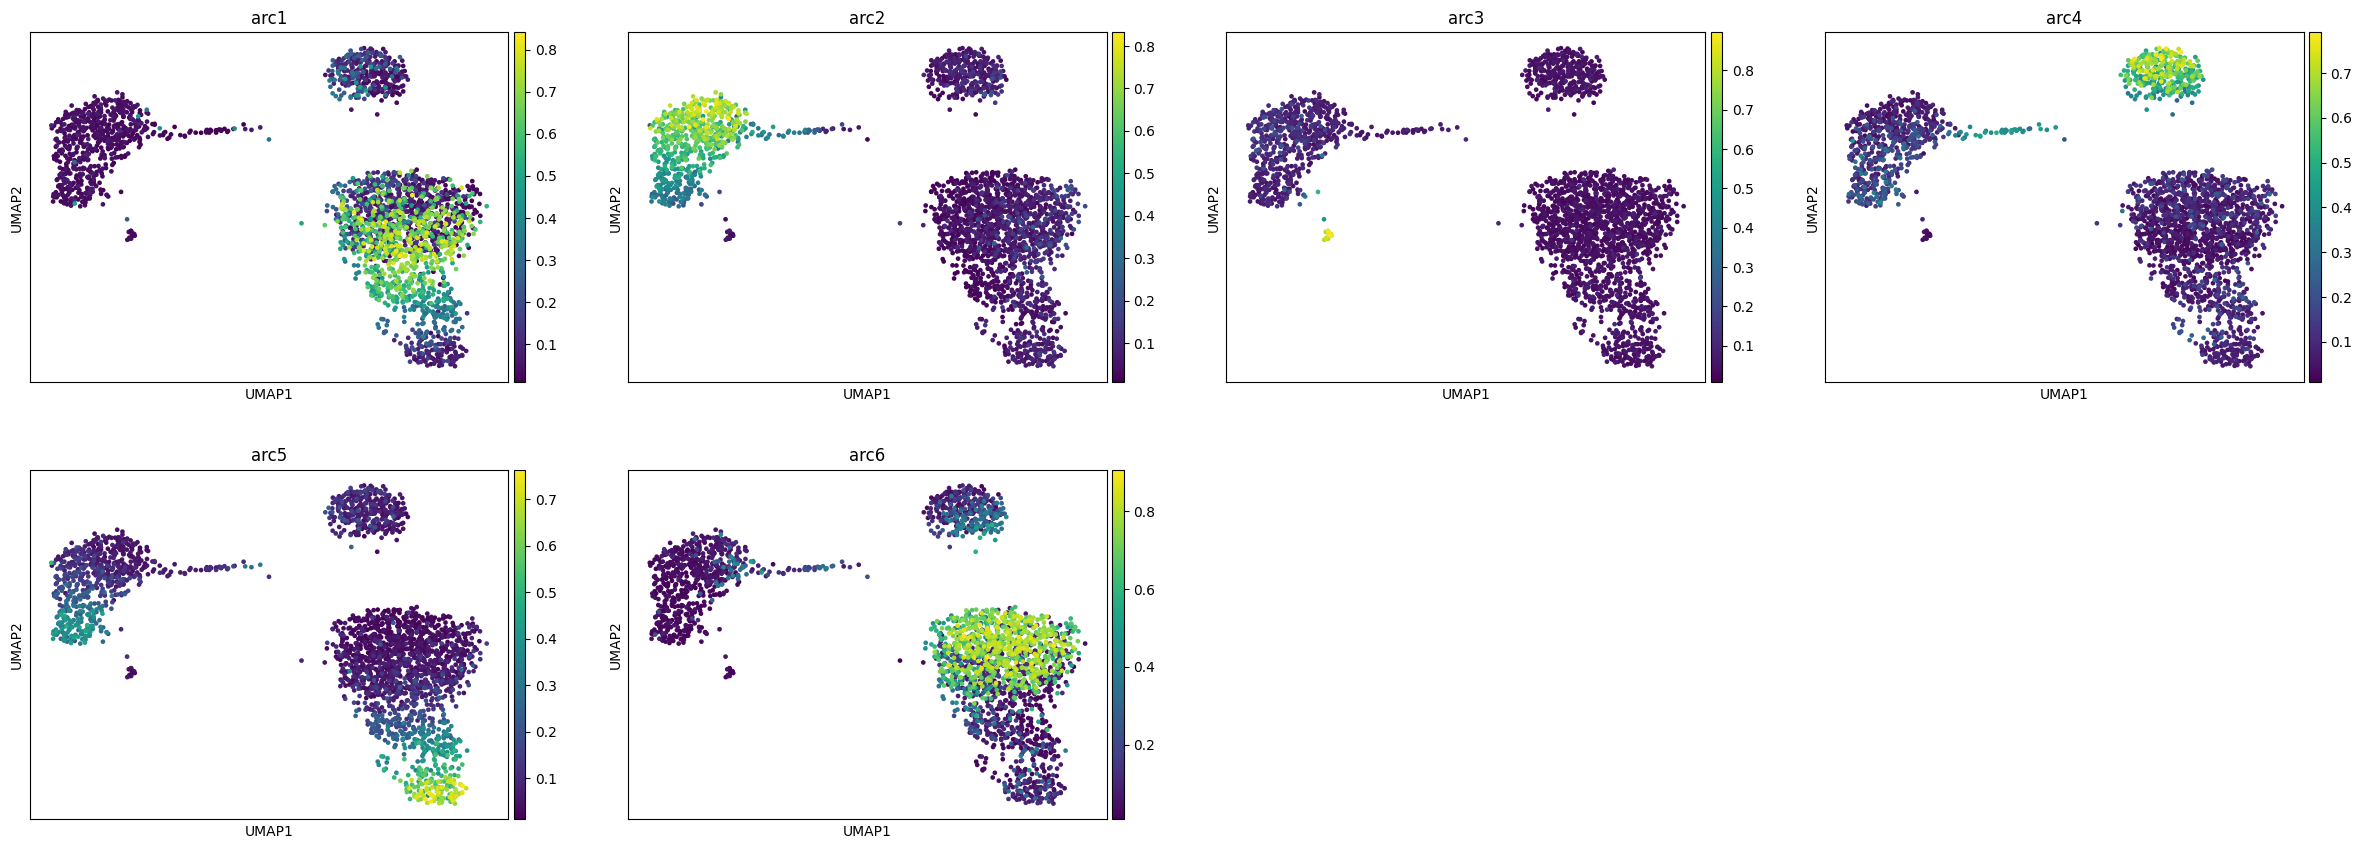

In [9]:
sc.pl.umap(adata, color=arc_names)

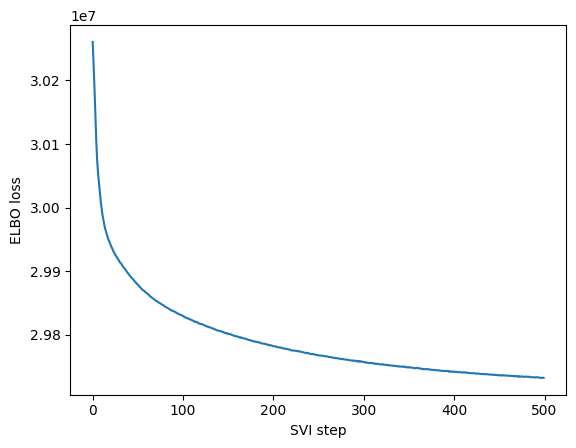

In [10]:
scdeepaa.plot_ELBO(res)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

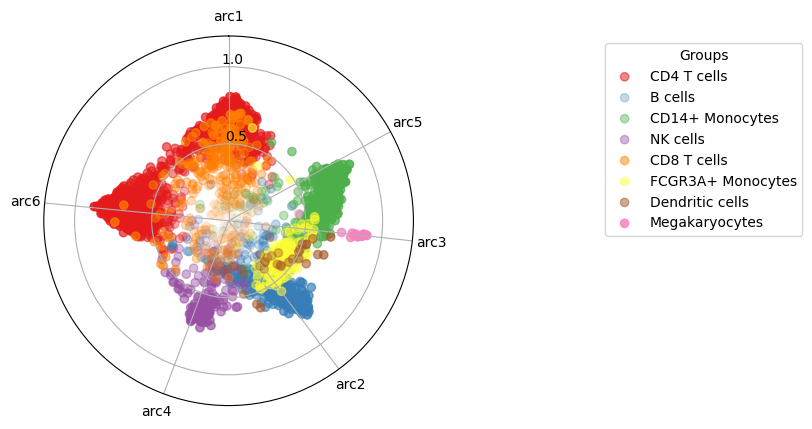

In [12]:

scdeepaa.plot_archetypes_simplex(res, color_by = adata.obs["louvain"], cmap = "Set1")